## Desafio 3

> Atenção: este notebook foi desenhado para funcionar no **Google Colab**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-colab```.

### Contador de Moedas

Dada a imagem abaixo crie um contador de moedas


![MoedaReal](https://github.com/FIAPON/fiap-ml-visao-computacional/blob/main/aula-3-segmentacao/desafio-3/imagens/real_original.jpg?raw=1)

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [32]:
!rm -rf fiap-ml-visao-computacional/

In [33]:
!git clone https://github.com/FIAPON/fiap-ml-visao-computacional.git

Cloning into 'fiap-ml-visao-computacional'...
remote: Enumerating objects: 65008, done.
remote: Counting objects: 100% (927/927), done.
remote: Compressing objects: 100% (768/768), done.
remote: Total 65008 (delta 180), reused 890 (delta 144), pack-reused 64081 (from 1)
Receiving objects: 100% (65008/65008), 676.48 MiB | 28.27 MiB/s, done.
Resolving deltas: 100% (195/195), done.
Updating files: 100% (66521/66521), done.


Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório.

In [34]:
%cd fiap-ml-visao-computacional/aula-3-segmentacao/desafio-3/

/content/fiap-ml-visao-computacional/aula-3-segmentacao/desafio-3/fiap-ml-visao-computacional/aula-3-segmentacao/desafio-3/fiap-ml-visao-computacional/aula-3-segmentacao/desafio-3


Importando as bibliotecas.

In [35]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Original')

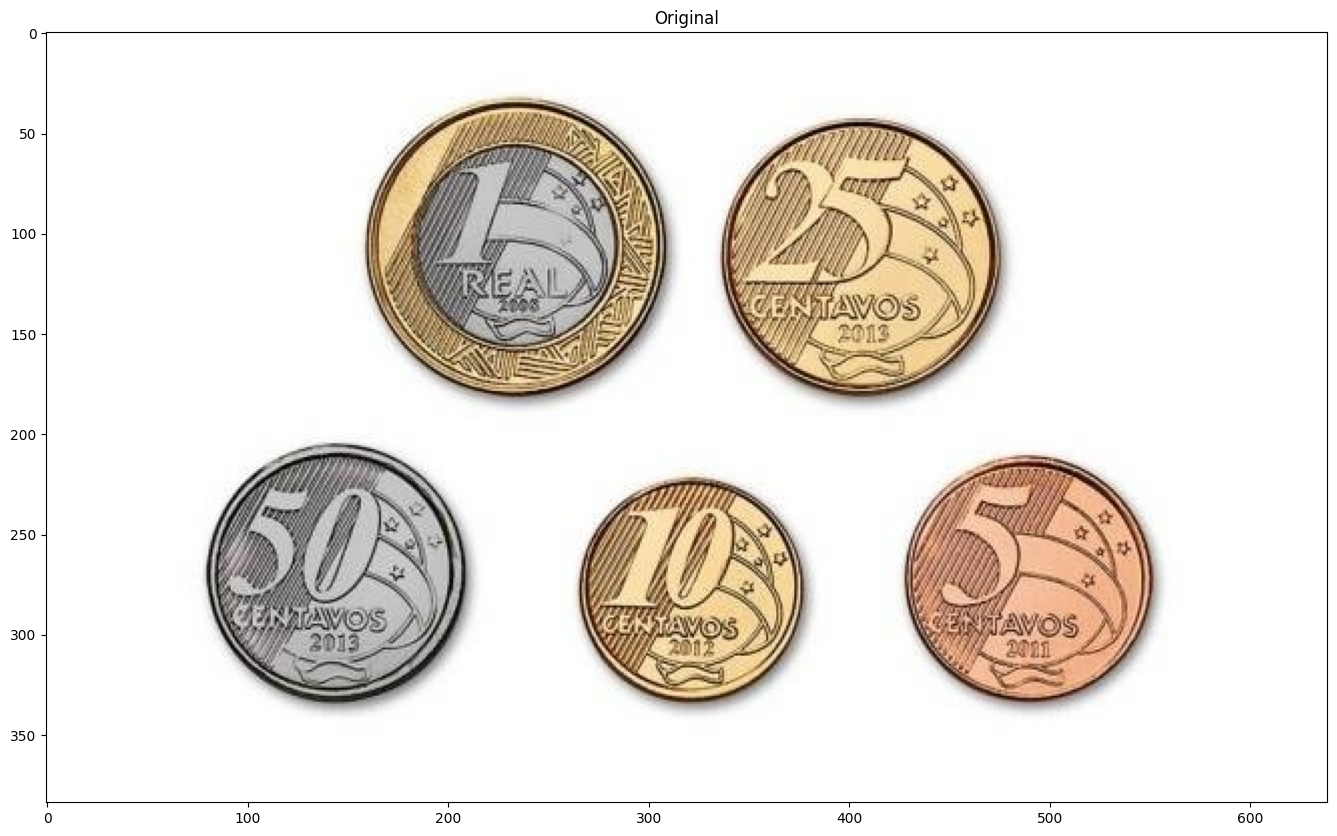

In [36]:
imagem = cv2.imread("imagens/real_original.jpg", cv2.IMREAD_COLOR)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem, cmap="gray")
plt.title("Original")


Converter a imagem em escala de cinza

In [37]:
# IMPLEMENTAR

A partir da imagem em escala de cinza, aplicar um filtro para borrar a imagem

In [38]:
# IMPLEMENTAR

Utilizar alguma função para encontrar os circulos e contar quantas moedas estão presentes na imagem.

In [39]:
# IMPLEMENTAR

Com a função anterior, apicar uma função `Circle` para desnehar os centros e bordas das moedas na imagem original

In [40]:
# IMPLEMENTAR

### Contador de moeda em dolar

O desafio consiste em escrever um script para detectar, destacar e contabilizar o número de moedas apresentadas na imagem abaixo:

![MoedaDolar](https://github.com/FIAPON/fiap-ml-visao-computacional/blob/main/aula-3-segmentacao/desafio-3/imagens/dolar_original.png)


Text(0.5, 1.0, 'Original')

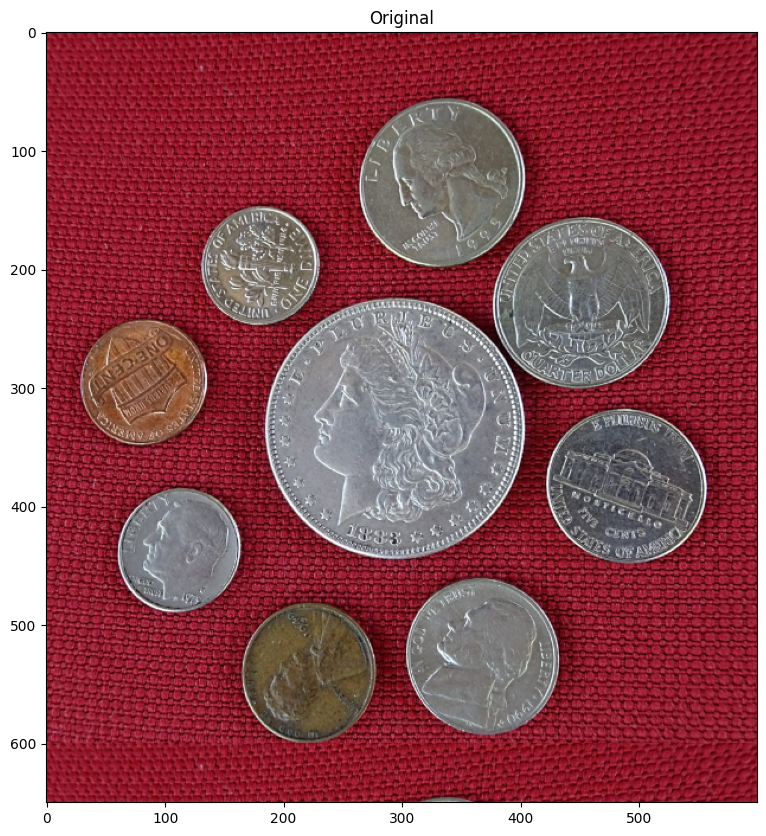

In [41]:
imagem = cv2.imread("imagens/dolar_original.png", cv2.IMREAD_COLOR)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem, cmap="gray")
plt.title("Original")

Converter a imagem em escala de cinza

Text(0.5, 1.0, 'Escala de Cinza')

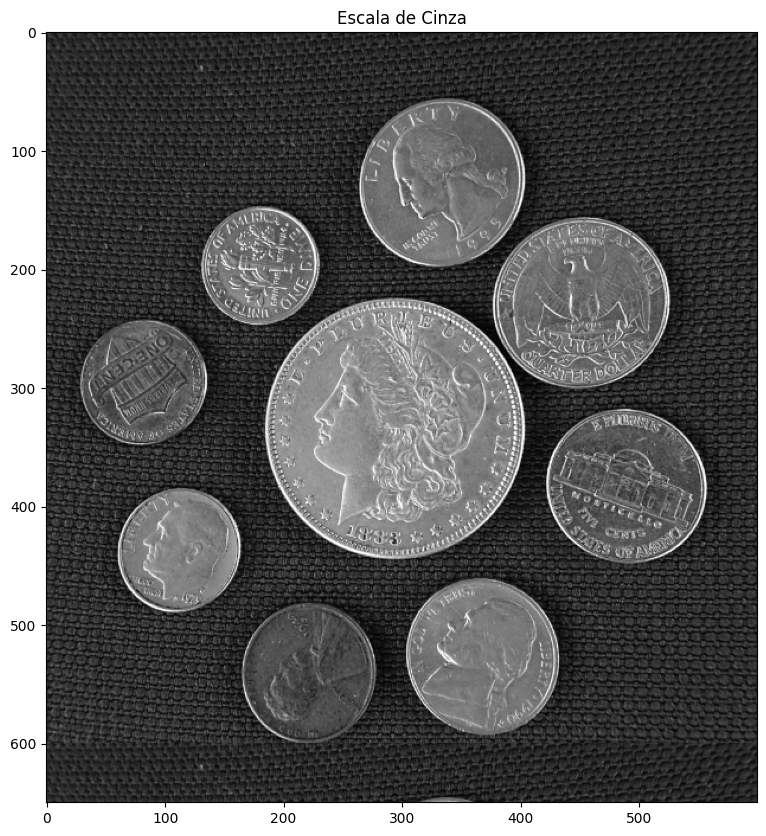

In [46]:
img_Gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.imshow(img_Gray, cmap="gray")
plt.title("Escala de Cinza")

Converter a imagem para um padrão bináro usando threshold

Text(0.5, 1.0, 'Binary Image')

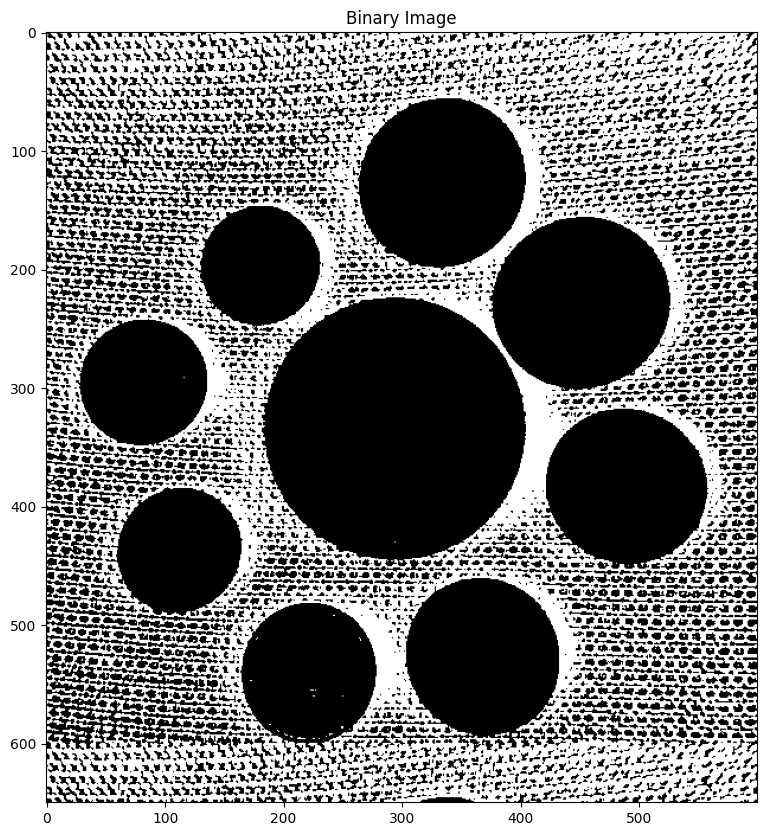

In [60]:
img_Blur = cv2.bilateralFilter(img_Gray, 1, 75, 75)

bin_type = cv2.THRESH_BINARY_INV
_, imgBinary = cv2.threshold(img_Blur, 47, 255, bin_type)

plt.figure(figsize=(20,10))
plt.imshow(imgBinary, cmap="gray")
plt.title("Binary Image")

Aplicar filtros morfológicos

Text(0.5, 1.0, 'Morphologic Image')

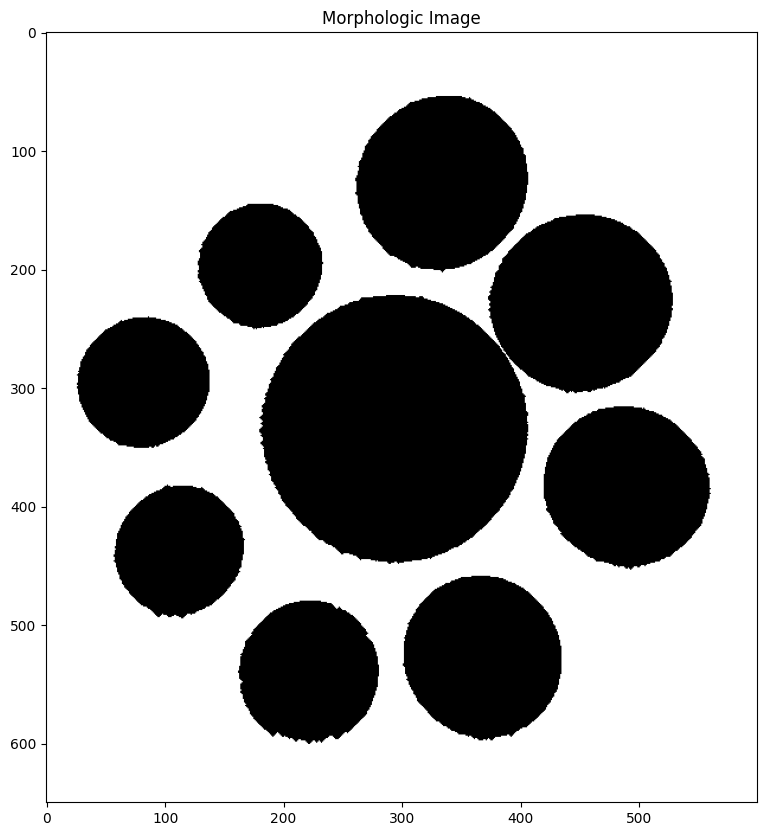

In [70]:
struct_element1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
imgdilate = cv2.dilate(imgBinary, struct_element1, iterations=4)
imgerode = cv2.erode(imgdilate, struct_element1, iterations=6)



plt.figure(figsize=(20,10))
plt.imshow(imgerode, cmap="gray")
plt.title("Morphologic Image")

Aplicar `SimpleBlobDetector` para locar as moeda, desenhar as bordas usando `drawkeypoints`

Centroide: (368.079926,527.023560)
Centroide: (111.871315,437.306458)
Centroide: (489.297760,383.121857)
Centroide: (81.744347,295.251556)
Centroide: (293.699341,334.408234)
Centroide: (451.151672,228.164322)
Centroide: (180.295212,196.685944)
Centroide: (333.750305,126.775993)
Number of coins detected = 8


Text(0.5, 1.0, 'SimpleBlobDetector Results')

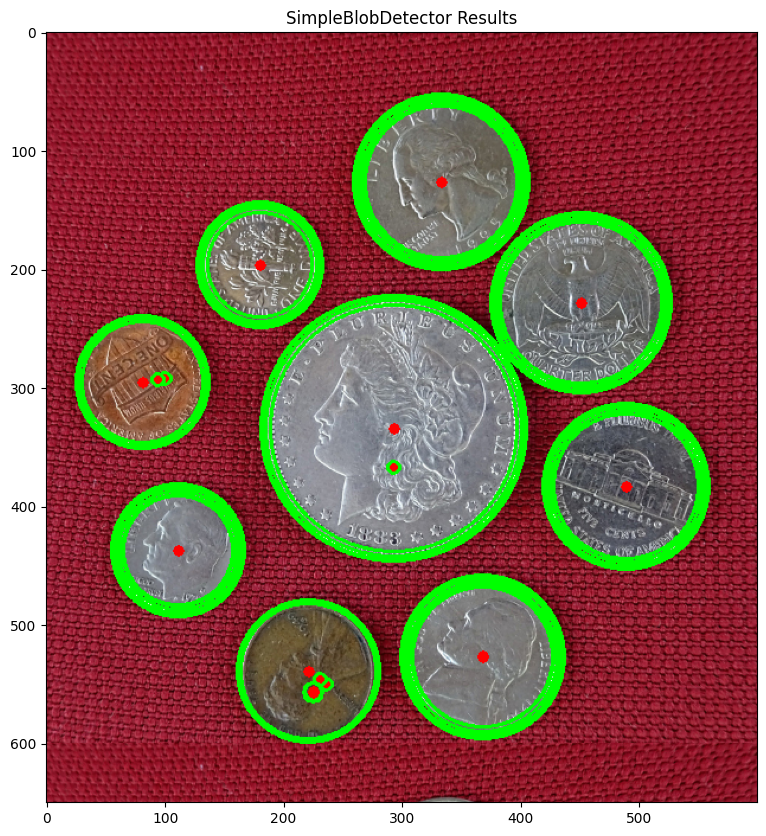

In [76]:
# Configuração dos parâmetros para o SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Desativar o filtro baseado na cor do blob
params.filterByColor = False

# Definir os limites de intensidade (threshold) para detecção
params.minThreshold = 0  # Valor mínimo de intensidade
params.maxThreshold = 255  # Valor máximo de intensidade

# Definir a cor do blob que será detectada (0 para preto, 255 para branco)
params.blobColor = 0  # Blobs pretos

# Configurar o tamanho do blob que será detectado (em pixels)
params.minArea = 45  # Tamanho mínimo
params.maxArea = 50000  # Tamanho máximo

# Habilitar a filtragem por circularidade e configurar os limites
params.filterByCircularity = True  # Ativar filtro por circularidade
params.minCircularity = 0.6  # Circularidade mínima (valores entre 0 e 1)
params.maxCircularity = 1  # Circularidade máxima (1 para perfeito)

# Desativar o filtro por convexidade
params.filterByConvexity = False  # Não aplicar filtro baseado em convexidade

# Criar o detector de blobs com os parâmetros definidos
det = cv2.SimpleBlobDetector_create(params)

# Detectar blobs na imagem processada `imgerode`
keypts = det.detect(imgerode)

# Desenhar os blobs detectados na imagem
res = cv2.drawKeypoints(
    imgerode, keypts, np.array([]),  # Imagem de entrada e keypoints detectados
    (0, 0, 255),  # Cor dos blobs desenhados (vermelho em BGR)
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS  # Estilo de desenho que inclui tamanho e orientação dos blobs
)

# Contador para rastrear o número de blobs detectados
coin = 0
for kp in keypts:
    # Imprimir a posição do centroide de cada blob
    print("Centroide: (%f,%f)" % (kp.pt[0], kp.pt[1]))
    coin += 1  # Incrementar o contador de blobs

    # Desenhar uma pequena caixa ao redor do centroide
    cv2.rectangle(
        imagem,
        (int(kp.pt[0]), int(kp.pt[1])),  # Coordenada inicial
        (int(kp.pt[0]) + 1, int(kp.pt[1]) + 1),  # Coordenada final
        (255, 0, 0),  # Cor da caixa (azul em BGR)
        8  # Espessura
    )

    # Desenhar um círculo representando o tamanho do blob
    cv2.circle(
        imagem,
        (int(kp.pt[0]), int(kp.pt[1])),  # Centro do círculo
        int(kp.size / 2),  # Raio do círculo
        (0, 255, 0),  # Cor do círculo (verde em BGR)
        2  # Espessura do círculo
    )

# Exibir o número total de blobs detectados
print(f'Number of coins detected = {coin}')

# Mostrar a imagem com os blobs detectados
plt.figure(figsize=(20, 10))
plt.imshow(res, cmap="gray")
plt.title("SimpleBlobDetector Image")

# Mostrar a imagem original com marcações adicionais
plt.imshow(imagem, cmap="gray")
plt.title("SimpleBlobDetector Results")
